In [1]:
# Import packages for data manipulation
import pandas as pd
import numpy as np
# Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('customer_churn_dataset-training-master.csv')

In [3]:
df.shape

(440833, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


In [5]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [6]:
df = df.dropna()

In [7]:
df.shape

(440832, 12)

In [8]:
df=df.drop('CustomerID',axis=1)

In [9]:
df.shape

(440832, 11)

In [10]:
df.dtypes

Age                  float64
Gender                object
Tenure               float64
Usage Frequency      float64
Support Calls        float64
Payment Delay        float64
Subscription Type     object
Contract Length       object
Total Spend          float64
Last Interaction     float64
Churn                float64
dtype: object

In [11]:
df['Churn'].value_counts()

Churn
1.0    249999
0.0    190833
Name: count, dtype: int64

In [12]:
col_train_list=df.drop(columns=['Churn']).columns.to_list()
col_train_list

['Age',
 'Gender',
 'Tenure',
 'Usage Frequency',
 'Support Calls',
 'Payment Delay',
 'Subscription Type',
 'Contract Length',
 'Total Spend',
 'Last Interaction']

In [13]:
from sklearn.feature_extraction import DictVectorizer

In [14]:
X = df.drop(columns=['Churn'])
y = df['Churn']

In [15]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score, roc_curve, auc, RocCurveDisplay, PrecisionRecallDisplay
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance
import pickle

In [16]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [17]:
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, stratify=y_train_full, test_size=0.25, random_state=42)

In [18]:
dic = {"X_train":X_train, "X_val":X_val, "X_test":X_test}
for x in dic:
    print(f'{x}: {len(dic[x])}')

X_train: 264498
X_val: 88167
X_test: 88167


In [19]:
from sklearn.feature_extraction import DictVectorizer

In [20]:
train_dict = X_train[col_train_list].to_dict(orient='records')

In [21]:
train_dict[0]

{'Age': 38.0,
 'Gender': 'Male',
 'Tenure': 8.0,
 'Usage Frequency': 22.0,
 'Support Calls': 6.0,
 'Payment Delay': 24.0,
 'Subscription Type': 'Basic',
 'Contract Length': 'Monthly',
 'Total Spend': 667.0,
 'Last Interaction': 27.0}

In [22]:
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

DictVectorizer(sparse=False)

In [23]:
X_train_dv = dv.transform(train_dict)

In [24]:
X_train_dv.shape

(264498, 15)

In [25]:
dv.feature_names_

['Age',
 'Contract Length=Annual',
 'Contract Length=Monthly',
 'Contract Length=Quarterly',
 'Gender=Female',
 'Gender=Male',
 'Last Interaction',
 'Payment Delay',
 'Subscription Type=Basic',
 'Subscription Type=Premium',
 'Subscription Type=Standard',
 'Support Calls',
 'Tenure',
 'Total Spend',
 'Usage Frequency']

In [26]:
val_dict = X_val[col_train_list].to_dict(orient='records')
X_val_dv = dv.transform(val_dict)

In [27]:
y_train = y_train.values
y_val = y_val.values

### Random Forest

In [28]:
# Instantiate the random forest classifier
rf = RandomForestClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100],
    'max_depth': [10,20],
    'min_samples_split': [2,5],
    'min_samples_leaf': [1,2],
    'max_features': ['sqrt']
}

# 3. Define a dictionary of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1']

# 4. Instantiate the GridSearchCV object
rf_cv = GridSearchCV(rf, param_grid, scoring=scoring, cv=4, refit='f1')

In [29]:
%%time
rf_cv.fit(X_train_dv, y_train)

C:\Users\gkb4u\anaconda3\envs\DS312\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


CPU times: total: 12min 24s
Wall time: 12min 35s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [10, 20], 'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5], 'n_estimators': [100]},
             refit='f1', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [30]:
rf_cv.best_estimator_.feature_importances_

array([0.138385  , 0.02402701, 0.10747898, 0.01530113, 0.01337384,
       0.01353125, 0.05327874, 0.12533144, 0.00093801, 0.00030985,
       0.00041751, 0.28787497, 0.01136422, 0.20421631, 0.00417175])

In [31]:
rf_cv.best_score_

np.float64(0.9989121079849446)

In [32]:
rf_cv.best_params_

{'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 100}

In [33]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, or accuracy

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean 'metric' score across all validation folds.
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy',
                   }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)
    # print(cv_results)
    
    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]
    # print(best_estimator_results)

    # Extract accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          },
                         )

    return table

In [34]:
results_cv = make_results('RF cv', rf_cv, 'f1')
results_cv

,model,precision,recall,F1,accuracy
0,RF cv,0.999987,0.99784,0.998912,0.998767


### XGBoost

In [35]:
# 1. Instantiate the XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic', random_state=42)

# 2. Create a dictionary of hyperparameters to tune
param_grid = {'max_depth': [3, 5, 10],
             'min_child_weight': [1, 2, 5],
             'learning_rate': [0.01, 0.05, 0.1],
             'n_estimators': [100]
             }

# 3. Define a dictionary of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1']

# 4. Instantiate the GridSearchCV object
xgb_cv = GridSearchCV(xgb, param_grid, scoring=scoring, cv=4, refit='f1')

In [36]:
%%time
xgb_cv.fit(X_train_dv, y_train)

CPU times: total: 10min 27s
Wall time: 1min 41s


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 10], 'min_child_weight': [1, 2, 5],
                         'n_estimators': [100]},
             refit='f1', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [37]:
xgb_cv.best_score_

np.float64(0.9999066557319513)

In [38]:
xgb_cv.best_params_

{'learning_rate': 0.1,
 'max_depth': 10,
 'min_child_weight': 1,
 'n_estimators': 100}

In [39]:
xgb_cv_results = make_results('XGB cv', xgb_cv, 'f1')
results_cv = pd.concat([results_cv, xgb_cv_results], axis=0)
results_cv

,model,precision,recall,F1,accuracy
0,RF cv,0.999987,0.997840,0.998912,0.998767
0,XGB cv,1.000000,0.999813,0.999907,0.999894


### AdaBoost

In [40]:
from sklearn.ensemble import AdaBoostClassifier

In [41]:
# Initialize the AdaBoost Classifier
adb = AdaBoostClassifier()
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.05, 0.1, 1],
    'algorithm': ['SAMME']    
}

scoring = ['accuracy', 'precision', 'recall', 'f1']

# Instantiate the GridSearchCV object
adb_cv = GridSearchCV(adb, param_grid, scoring=scoring, cv=4, refit='f1')

In [42]:
%%time
adb_cv.fit(X_train_dv, y_train)

CPU times: total: 16min 28s
Wall time: 16min 36s


GridSearchCV(cv=4, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME'],
                         'learning_rate': [0.01, 0.05, 0.1, 1],
                         'n_estimators': [100, 200]},
             refit='f1', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [43]:
adb_cv.best_score_

np.float64(0.9802571322072737)

In [44]:
adb_cv.best_params_

{'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 200}

In [45]:
adb_cv_results = make_results('AdaB cv', adb_cv, 'f1')
results_cv = pd.concat([results_cv, adb_cv_results], axis=0)
results_cv

,model,precision,recall,F1,accuracy
0,RF cv,0.999987,0.997840,0.998912,0.998767
0,XGB cv,1.000000,0.999813,0.999907,0.999894
0,AdaB cv,0.996282,0.964740,0.980257,0.977962


## Model Selection

In [48]:
def get_test_scores(model_name:str, preds, y_test_data):
    '''
    Generate a table of test scores.

    In:
        model_name (string): Your choice: how the model will be named in the output table
        preds: numpy array of test predictions
        y_test_data: numpy array of y_test data

    Out:
        table: a pandas df of precision, recall, f1, and accuracy scores for your model
    '''
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy]
                          })

    return table

### Random Forest

In [47]:
# Use random forest model to predict on validation data
rf_val_preds = rf_cv.best_estimator_.predict(X_val_dv)

In [49]:
# Get validation scores for RF model
results_validation = get_test_scores('RF val', rf_val_preds, y_val)

results_validation

,model,precision,recall,F1,accuracy
0,RF val,0.9999,0.99848,0.999189,0.999081


### XGBoost

In [50]:
# Use XGBoost model to predict on validation data
xgb_val_preds = xgb_cv.best_estimator_.predict(X_val_dv)

# Get validation scores for XGBoost model
xgb_val_scores = get_test_scores('XGB val', xgb_val_preds, y_val)

# Append to the results table
results_validation = pd.concat([results_validation, xgb_val_scores], axis=0)
results_validation

,model,precision,recall,F1,accuracy
0,RF val,0.9999,0.99848,0.999189,0.999081
0,XGB val,1.0000,0.99990,0.999950,0.999943


### AdaBoost

In [51]:
# Use AdaBoost model to predict on validation data
adb_val_preds = adb_cv.best_estimator_.predict(X_val_dv)

# Get validation scores for AdaBoost model
adb_val_scores = get_test_scores('AdaB val', adb_val_preds, y_val)

# Append to the results table
results_validation = pd.concat([results_validation, adb_val_scores], axis=0)
results_validation

,model,precision,recall,F1,accuracy
0,RF val,0.999900,0.99848,0.999189,0.999081
0,XGB val,1.000000,0.99990,0.999950,0.999943
0,AdaB val,0.996125,0.96658,0.981130,0.978915


## Champion Model

In [52]:
test_dict = X_test[col_train_list].to_dict(orient='records')
X_test_dv = dv.transform(test_dict)

In [59]:
y_test = y_test.values

In [60]:
# Use XGBoost model to predict on test data
xgb_test_preds = xgb_cv.best_estimator_.predict(X_test_dv)

# Get test scores for XGBoost model
Result = get_test_scores('XGBoost test', xgb_test_preds, y_test)

Result

,model,precision,recall,F1,accuracy
0,XGBoost test,1.0,0.99984,0.99992,0.999909


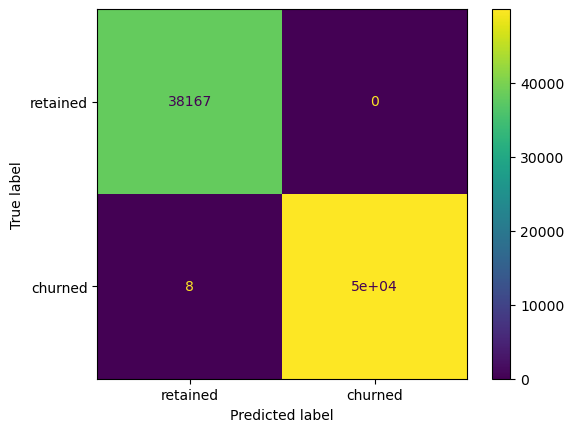

In [61]:
# Generate array of values for confusion matrix
cm = confusion_matrix(y_test, xgb_test_preds, labels=xgb_cv.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=['retained', 'churned'])
disp.plot();

In [62]:
# Serialize an object
with open('XGBoost_model.pkl', 'wb') as f_out:
   pickle.dump((dv, xgb_cv), f_out)

In [63]:
xgb_test_preds

array([1, 0, 1, ..., 0, 0, 0])